<a href="https://colab.research.google.com/github/danoAasland/WDL_EPL/blob/master/EPL_WDL_Outcome_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
#set style of graphs
sns.set(style="darkgrid", rc={'figure.figsize':(12, 6)})

In [0]:
BASE_URL = "https://s5.sir.sportradar.com/bet365/en/1/season/66441/fixtures"

In [0]:
# Save file locally
page = requests.get(BASE_URL).text

soup = BeautifulSoup(page)

In [0]:
#to eliminate any game rows for canceled games add home team name to list
cancelGames = ['Aston Villa', 'Man City']
#else just comment line above and uncomment one below
#cancelGames = []

In [0]:
#soup

In [0]:
#epl_table = soup.find('table',{'class':'table'})
#epl_table

In [0]:
epl_table = soup.find('table',{'class':'table'})
xTemp = epl_table.find_all("td", {"class":"mobile-width-5 text-center"})
if len(xTemp) == 0:
  xTemp = epl_table.find_all("td", {"class":"mobile-width-5 text-center "})

#print(xTemp)

In [0]:
epl_table = soup.find('table',{'class':'table'})
team_raw = epl_table.find_all("div", class_="hidden-xs-up visible-sm-up wrap")
team_clean = [row.text for row in team_raw]
home_team = team_clean[::2]
away_team = team_clean[1::2]
epl_df = pd.DataFrame()
epl_df['Home'] = home_team
epl_df['Away'] = away_team
dates_raw = epl_table.find_all("td", class_="table-subheader no-wrap text-left")
dates_clean = [row.text for row in dates_raw]
game_week = dates_clean[0] + " - " + dates_clean[-1]
epl_df['Date'] = game_week
time_raw = epl_table.find_all("td", class_="mobile-width-5 text-center ")
if len(xTemp) == 0:
  time_raw = epl_table.find_all("td", {"class":"mobile-width-5 text-center"})
time_clean = [row.text for row in time_raw]
epl_df['Time'] = time_clean
#print(epl_df['Home'])
odds_raw = epl_table.find_all("button")
odds_semi_clean = [row.text for row in odds_raw]

#check for canceled games
epl_df = epl_df[~epl_df['Home'].isin(cancelGames)].copy()

#add game prob. to each match
home_win_odds = odds_semi_clean[::3][::2]
draw_odds = odds_semi_clean[1::3][::2]
away_win_odds = odds_semi_clean[2::3][::2]

In [0]:
epl_df['Home_Win'] = home_win_odds
epl_df['Home_Win'] = epl_df['Home_Win'].astype(float)
epl_df['Draw'] = draw_odds
epl_df['Draw'] = epl_df['Draw'].astype(float)
epl_df['Away_Win'] = away_win_odds
epl_df['Away_Win'] = epl_df['Away_Win'].astype(float)

In [0]:
#func. to return prob of each event and append to df
epl_df['Home_Win'] = epl_df['Home_Win'].apply(lambda x: (1/x) - 0.034)
epl_df['Draw'] = epl_df['Draw'].apply(lambda x: (1/x) - 0.057)
epl_df['Away_Win'] = epl_df['Away_Win'].apply(lambda x: (1/x) - 0.037)

epl_df['Home_Win'] = epl_df['Home_Win'].apply(lambda x: x * 100)
epl_df['Draw'] = epl_df['Draw'].apply(lambda x: x * 100)
epl_df['Away_Win'] = epl_df['Away_Win'].apply(lambda x: x * 100)

epl_df['comboTeam'] = epl_df[['Home', 'Away']].apply(lambda x: ' - '.join(x), axis=1)

In [0]:
epl_df

,Home,Away,Date,Time,Home_Win,Draw,Away_Win,comboTeam
0,Norwich,Leicester,28/02/20 - 01/03/20,12:00,20.409524,20.615789,50.944809,Norwich - Leicester
1,Brighton,C Palace,28/02/20 - 01/03/20,04:30,44.219048,25.069231,22.966667,Brighton - C Palace
2,Newcastle,Burnley,28/02/20 - 01/03/20,07:00,34.767939,25.550000,32.663636,Newcastle - Burnley
3,West Ham,Southampton,28/02/20 - 01/03/20,07:00,37.416327,22.871429,32.663636,West Ham - Southampton
5,Bournemouth,Chelsea,28/02/20 - 01/03/20,07:00,20.990244,21.327027,50.354054,Bournemouth - Chelsea
6,Watford,Liverpool,28/02/20 - 01/03/20,09:30,11.984615,15.352632,65.265517,Watford - Liverpool
7,Everton,Man Utd,28/02/20 - 01/03/20,06:00,35.815686,24.603030,32.014286,Everton - Man Utd
8,Tottenham,Wolverhampton,28/02/20 - 01/03/20,06:00,36.600000,25.550000,29.633333,Tottenham - Wolverhampton


**HOME TEAM WIN OUTPUT**

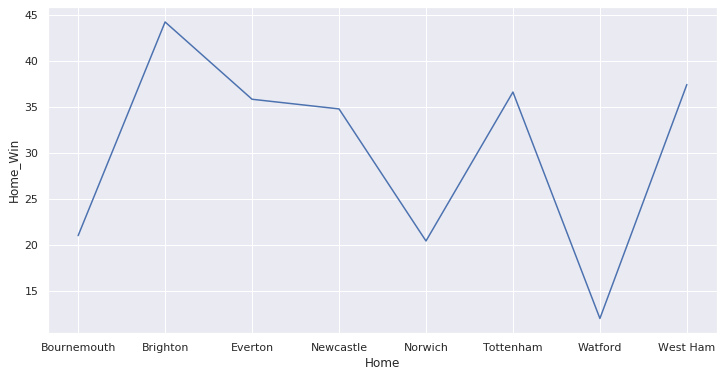

In [0]:
sns.lineplot(x="Home", y="Home_Win",
             data=epl_df)

**GAME DRAW OUTPUT**

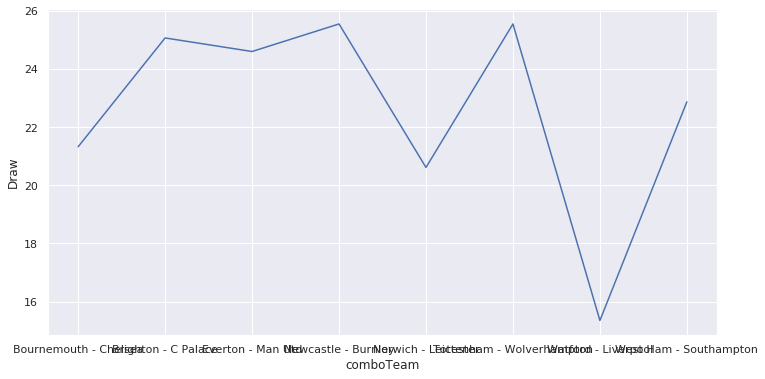

In [0]:
sns.lineplot(x="comboTeam", y="Draw",
             data=epl_df)

**AWAY TEAM WIN OUTPUT**

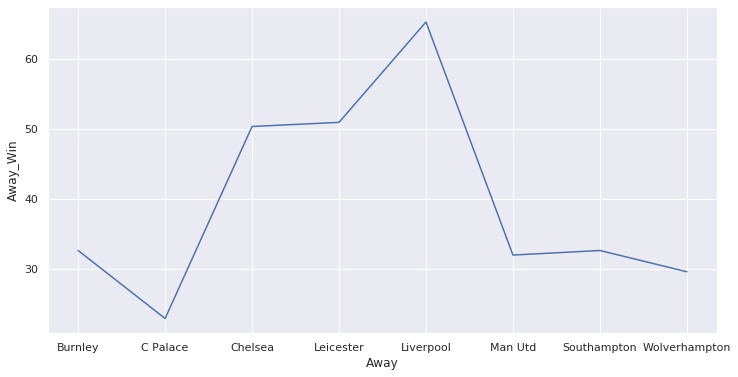

In [0]:
sns.lineplot(x="Away", y="Away_Win",
             data=epl_df)